In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [10]:
a = tf.constant(2.0)  # tf.Tensor(2.0, shape=(), dtype=float32) 상수
y = tf.constant(8.0)
x = tf.Variable(10.0) # <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=10.0> 변수


loss = tf.math.abs(a*x - y) # <tf.Tensor: shape=(), dtype=float32, numpy=12.0>
loss.numpy()

12.0

In [11]:
def train_func():
    with tf.GradientTape() as tape:
        loss = tf.math.abs(a*x - y)

    dx = tape.gradient(loss, x) # with 구문안에 있어도 상관없음
    print(dx)
    print('x = {}, dx = {}'.format(x.numpy(), dx))

    x.assign(x - dx) # x = x - dx

# Run train_func() UDF repeately
for i in range(4):
    train_func()

tf.Tensor(2.0, shape=(), dtype=float32)
x = 10.0, dx = 2.0
tf.Tensor(2.0, shape=(), dtype=float32)
x = 8.0, dx = 2.0
tf.Tensor(2.0, shape=(), dtype=float32)
x = 6.0, dx = 2.0
tf.Tensor(0.0, shape=(), dtype=float32)
x = 4.0, dx = 0.0


GradientTape : https://www.tensorflow.org/guide/autodiff?hl=ko

In [18]:
%%time
# 데이터 집합 생성
x = np.array(np.arange(-5, 5, 0.1))
y = 2*x*x + 3*x + 5 # a=2, b=3, c=5인 2차방정식
lr = 0.001

w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)

# 계수 설정 : 초기값
histLoss = []
for epoch in range(1, 10001):
    with tf.GradientTape() as tape:
        loss = tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + (b - y)))) # rmse를 하겠다는 것

    dw1, dw2, db = tape.gradient(loss, [w1, w2, b]) # loss 에 대해 w1, w2 , b를 미분 # 가중치를 기주으로 loss를 편미분한 값이 필요

    w1.assign_sub(lr*dw1) # w1 = w1 - (lr * dw) 계산한 것을 다시 자기 자신한테 할당(assign)하겠다는 것
    w2.assign_sub(lr*dw2) # assign => weight를 업데이트 하겠다는 것 w2.assign(w1-lr*dw2)와 같음
    b.assign_sub(lr*db) # sub 는 빼기를 한다는 것(빼는 것까지 해줌)

    histLoss.append(loss)
    if epoch % 500 == 0:
        print("epoch = {}, loss = {}".format(epoch, loss))
# 학습


epoch = 500, loss = 3.6593616008758545
epoch = 1000, loss = 2.3891167640686035
epoch = 1500, loss = 2.09289288520813
epoch = 2000, loss = 1.8696733713150024
epoch = 2500, loss = 1.648393154144287
epoch = 3000, loss = 1.427135944366455
epoch = 3500, loss = 1.2058779001235962
epoch = 4000, loss = 0.9846198558807373
epoch = 4500, loss = 0.7633618116378784
epoch = 5000, loss = 0.5421038269996643
epoch = 5500, loss = 0.3208458125591278
epoch = 6000, loss = 0.0995878204703331
epoch = 6500, loss = 0.06282508373260498
epoch = 7000, loss = 0.06280343979597092
epoch = 7500, loss = 0.06270615011453629
epoch = 8000, loss = 0.06270615011453629
epoch = 8500, loss = 0.06270615011453629
epoch = 9000, loss = 0.06270615011453629
epoch = 9500, loss = 0.06270615011453629
epoch = 10000, loss = 0.06270615011453629
CPU times: user 17.2 s, sys: 56.2 ms, total: 17.3 s
Wall time: 17.3 s
Parser   : 141 ms



추정 결과 :
w1 = 2.01
w2 = 3.00
b = 5.00
final loss = 0.0627


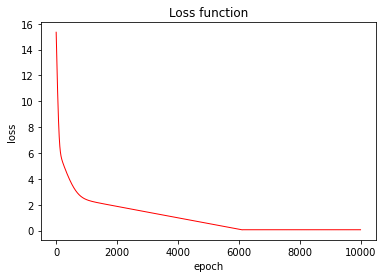

In [16]:
print("\n추정 결과 :")
print("w1 = %.2f" % w1.numpy())
print("w2 = %.2f" % w2.numpy())
print("b = %.2f" % b.numpy())
print("final loss = %.4f" % loss.numpy())

plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# SGD + Momentum

In [17]:
import tensorflow as tf
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

In [20]:
%%time
# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5

# 그래프를 생성한다.   
w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)
var_list = [w1, w2, b]  # variable list

# SGD optimizers 기능을 사용하고, Momentum 방법을 사용한다.
opt = optimizers.SGD(learning_rate=0.001, momentum=0.7, nesterov=False)

histLoss = []
for epoch in range(1, 10001):
    with tf.GradientTape() as tape:
        loss = tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + (b - y))))

    grads = tape.gradient(loss, var_list) # assign_sub와 같은 기능
    opt.apply_gradients(zip(grads, var_list))

    if epoch % 500 == 0:
        histLoss.append(loss.numpy())
        print("epoch = {}, loss = {:.4f}".format(epoch, loss))

epoch = 500, loss = 2.0248
epoch = 1000, loss = 1.2869
epoch = 1500, loss = 0.5494
epoch = 2000, loss = 0.0369
epoch = 2500, loss = 0.0369
epoch = 3000, loss = 0.0369
epoch = 3500, loss = 0.0369
epoch = 4000, loss = 0.0369
epoch = 4500, loss = 0.0369
epoch = 5000, loss = 0.0369
epoch = 5500, loss = 0.0369
epoch = 6000, loss = 0.0369
epoch = 6500, loss = 0.0369
epoch = 7000, loss = 0.0369
epoch = 7500, loss = 0.0369
epoch = 8000, loss = 0.0369
epoch = 8500, loss = 0.0369
epoch = 9000, loss = 0.0369
epoch = 9500, loss = 0.0369
epoch = 10000, loss = 0.0369
CPU times: user 22.5 s, sys: 57.9 ms, total: 22.6 s
Wall time: 22.7 s


## ↳ 전체 걸리는 시간이 더 걸리더라도 수렴하는 속도가 빠르다


추정 결과 :
w1 = 2.00
w2 = 3.00
b = 5.00
final loss = 0.0369


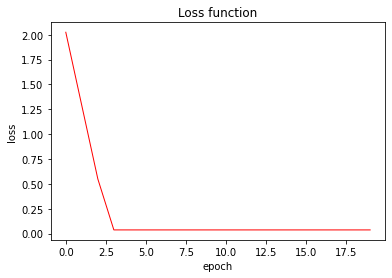

In [21]:
print("\n추정 결과 :")
print("w1 = %.2f" % w1.numpy())
print("w2 = %.2f" % w2.numpy())
print("b = %.2f" % b.numpy())
print("final loss = %.4f" % loss.numpy())

plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# Adam + minimize()

In [22]:
import tensorflow as tf
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5

# 그래프를 생성한다.   
w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)

In [25]:
def loss():
    return tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + (b - y))))

opt = optimizers.Adam(learning_rate=0.01)

histLoss = []
for epoch in range(1, 10001):
    # loss 함수만 주면 됨
    opt.minimize(loss, var_list=[w1, w2, b])
    """
    #     with tf.GradientTape() as tape:
    #     loss = tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + (b - y))))

    # grads = tape.gradient(loss, var_list)
    # opt.apply_gradients(zip(grads, var_list))
 =====> minimize를 쓰면 위를 다시 선언할 필요 없음 단, loss함수를 앞서 정의해야함<=====
    """
    histLoss.append(loss())
    if epoch % 500 ==0:
        print("epoch = {}, loss = {}".format(epoch, histLoss[-1]))



epoch = 500, loss = 0.007271111011505127
epoch = 1000, loss = 0.007274191360920668
epoch = 1500, loss = 0.007271403446793556
epoch = 2000, loss = 0.007271422538906336
epoch = 2500, loss = 0.007271403446793556
epoch = 3000, loss = 0.007250307593494654
epoch = 3500, loss = 0.007259327918291092
epoch = 4000, loss = 0.007250875700265169
epoch = 4500, loss = 0.007232639007270336
epoch = 5000, loss = 0.007232275325804949
epoch = 5500, loss = 0.007232509553432465
epoch = 6000, loss = 0.007232275325804949
epoch = 6500, loss = 0.007232275325804949
epoch = 7000, loss = 0.007232639007270336
epoch = 7500, loss = 0.007232275325804949
epoch = 8000, loss = 0.007232275325804949
epoch = 8500, loss = 0.007232275325804949
epoch = 9000, loss = 0.007232639007270336
epoch = 9500, loss = 0.00723259337246418
epoch = 10000, loss = 0.007232275325804949



추정 결과 :
w1 = 2.00
w2 = 3.00
b = 5.00


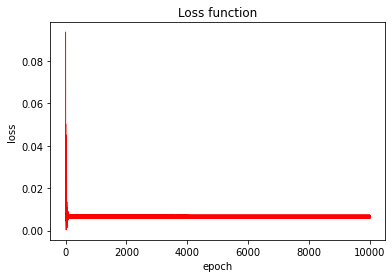

In [26]:
print("\n추정 결과 :")
print("w1 = %.2f" % w1.numpy())
print("w2 = %.2f" % w2.numpy())
print("b = %.2f" % b.numpy())

plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# Keras 
## Sequential model

Epoch 1/300
10/10 [==============================] - 0s 1ms/step - loss: 1191.2256
Epoch 2/300
10/10 [==============================] - 0s 1ms/step - loss: 783.1434
Epoch 3/300
10/10 [==============================] - 0s 2ms/step - loss: 517.6934
Epoch 4/300
10/10 [==============================] - 0s 1ms/step - loss: 324.1559
Epoch 5/300
10/10 [==============================] - 0s 2ms/step - loss: 186.8771
Epoch 6/300
10/10 [==============================] - 0s 2ms/step - loss: 95.4674
Epoch 7/300
10/10 [==============================] - 0s 2ms/step - loss: 40.2709
Epoch 8/300
10/10 [==============================] - 0s 1ms/step - loss: 12.8271
Epoch 9/300
10/10 [==============================] - 0s 2ms/step - loss: 3.4203
Epoch 10/300
10/10 [==============================] - 0s 1ms/step - loss: 1.2938
Epoch 11/300
10/10 [==============================] - 0s 1ms/step - loss: 0.7690
Epoch 12/300
10/10 [==============================] - 0s 1ms/step - loss: 0.5572
Epoch 13/300
10/10 [===

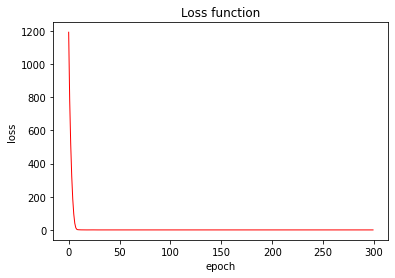

In [38]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5
dataX = np.stack([x*x, x]).T

# 그래프를 생성한다.
model = Sequential()
model.add(Dense(1, input_dim = 2))
model.compile(loss='mse', optimizer=optimizers.RMSprop(learning_rate=0.05))
h = model.fit(dataX, y, batch_size = 10, epochs=300)

# 학습 결과를 확인한다.
parameters = model.layers[0].get_weights()
print("\n추정 결과 :")
print("w1 = %.2f" % parameters[0][0][0])
print("w2 = %.2f" % parameters[0][1][0])
print("b = %.2f" % parameters[1][0])

plt.plot(h.history['loss'], color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [33]:
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f5d36be88d0>>

## Functional API

In [43]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5
dataX = np.stack([x*x, x]).T

# 그래프를 생성한다.   
# xInput = Input(batch_shape=(None, dataX.shape[1]))
# yOutput = Dense(1)(xInput)
# model = Model(xInput, yOutput)
# model.compile(loss='mse', optimizer=optimizers.Adam(learning_rate=0.05))

# h = model.fit(dataX, y, batch_size=10, epochs=300)
# # 학습 결과를 확인한다.
# parameters = model.layers[1].get_weights()
# print("\n추정 결과 :")
# print("w1 = %.2f" % parameters[0][0][0])
# print("w2 = %.2f" % parameters[0][1][0])
# print("b = %.2f" % parameters[1][0])

# plt.plot(h.history['loss'], color='red', linewidth=1)
# plt.title("Loss function")
# plt.xlabel("epoch")
# plt.ylabel("loss")
# plt.show()

(100,)

# tensorflow 1.4로 iris 분류

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = pd.get_dummies(iris.target).to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, 
                                                    test_size=0.3,
                                                    random_state=1)

In [ ]:
# X와 y를 저장할 변수 선언
x = tf.placeholder(tf.float32, [None, 4]) # 변수 수가 4개 # input을 4개 받음
y = tf.placeholder(tf.float32, [None, 3]) # 분류 클래스 수가 3개

In [ ]:
# Weight와 bias를 저장할 변수 선언
W = tf.Variable(tf.zeros([4, 3])) # input 4개
b = tf.Variable(tf.zeros([3])) # output 3개

In [ ]:
# 출력을 정의
h = tf.nn.softmax(tf.matmul(x, W) + b)

In [ ]:
# 손실함수 정의
cross_entropy = -tf.reduce_sum(y*tf.log(h), reduction_indices=[1])
loss = tf.reduce_mean(cross_entropy)

In [ ]:
# 학습(훈련) 정의(옵티마이저, 학습률)
train = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

In [ ]:
init = tf.global_variables_initializer()

In [ ]:
sess = tf.Session()
sess.run(init)

In [ ]:
for i in range(100000):
    _, loss_value = sess.run([train, loss], feed_dict={x:train_X, y:train_y})
    if i%10000 == 0:
        print(i, loss_value)

0 1.0986123
10000 0.34161025
20000 0.25733852
30000 0.21406321
40000 0.18752664
50000 0.16956551
60000 0.15657532
70000 0.14672598
80000 0.13898851
90000 0.13273858


In [ ]:
correct_prediction = tf.equal(tf.argmax(h, 1), tf.argmax(y, 1))

In [ ]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
print(sess.run(accuracy, feed_dict={x:test_X, y:test_y}))

0.9777778


# Keras 

In [ ]:
import tensorflow as tf

In [ ]:
# example of a model defined with the sequential api
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [ ]:
%time


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
Test Accuracy: 0.933


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [ ]:

%time


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs
Test Accuracy: 1.000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


# Functional API

In [ ]:
i     = Input(shape=(n_features,)) # 입력레이어
n     = Dense(10)(i)
n     = Dense(8)(n)
o     = Dense(3, activation='softmax')(n) # 출력레이어
model = Model(inputs=i, outputs=o) # 모델을 만든다

In [ ]:
%time


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
Test Accuracy: 1.000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
